# Modules and Connections

In [9]:
# import needed modules
from sqlalchemy import create_engine
from config import pw
import matplotlib.pyplot as plt

In [10]:
# create engine and connect the data base
engine = create_engine("postgresql+psycopg2://postgres:" + pw + "@localhost:5432/Homework")
connection = engine.connect()

# Histogram

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

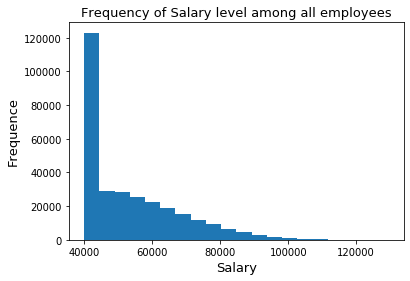

In [18]:
# Prepare for Histogram

# query the needed data
data_hist = engine.execute('SELECT salary FROM salaries')
# save results in a list
salaries_list = [i[0] for i in data_hist]
# plot the results
plt.hist(salaries_list, bins=20)
plt.xlabel("Salary", fontsize=13)
plt.ylabel("Frequence", fontsize=13)
plt.title("Frequency of Salary level among all employees", fontsize=13)
plt.tight_layout

# Bar Chart

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

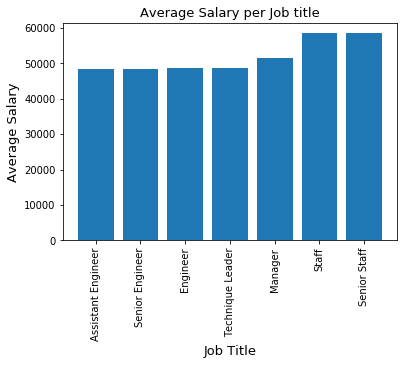

In [27]:
# Prepare for Bar Chart

# query the needed data
data_bar = engine.execute('SELECT t.title, ROUND(AVG(s.salary),0) \
FROM salaries s \
LEFT JOIN titles t \
ON t.emp_no = s.emp_no \
GROUP BY t.title \
ORDER BY ROUND(AVG(s.salary),0)').fetchall()

# save results in a list
salaries_title = [i[0] for i in data_bar]
salaries_avg = [int(i[1]) for i in data_bar]

# Plot the chart
plt.bar(salaries_title,salaries_avg)
plt.xticks(rotation=90)
plt.xlabel("Job Title", fontsize=13)
plt.ylabel("Average Salary", fontsize=13)
plt.title("Average Salary per Job title", fontsize=13)
plt.tight_layout

# Epilogue ID Check

In [14]:
info_my_emp_no = engine.execute('SELECT * \
FROM employees \
WHERE emp_no = 499942')

for i in info_my_emp_no:
    print(i)

(499942, datetime.date(1963, 1, 10), 'April', 'Foolsday', 'F', datetime.date(1997, 2, 10))
